In [1]:
import numpy as np
import utils.exampleFunctions as ex_func 
import utils.generalDefinitions as gen_def
import utils.models as models
import utils.samplers as samplers
import matplotlib.pyplot as plt
import pandas as pd
import optuna

In [ ]:
#Our ALgorithm vs Optuna, #15 Iterations, 1 repeat
function_names = ex_func.function_ranges.keys()

# Her bir fonksiyon için işlemleri gerçekleştir
number_of_repeats = 1

min_iter_first = {
    "Function": [],
    "Iteration to Find Min": []
}

min_iter_second = {
    "Function": [],
    "Iteration to Find Min": []
}

for function_name in function_names:
    if True:
        #print(f"Working on function: {function_name}")
    
        total_iterations = 0

        for i in range(number_of_repeats):
            iteration_count = 0
            if True:
                    
                try:
                    

                    function_param = getattr(ex_func, function_name.lower().replace(" ", "_"))

                    # Aralığı al
                    range_param = ex_func.function_ranges[function_name]
                    dimension = len(ex_func.function_ranges[function_name])


                    # Generate initial samples
                    sampler = samplers.LatinHypercubeSampling(function_param)
                    initial_points = sampler.sample(num_samples=5, ranges=range_param)
                    initial_values = np.array([function_param(i) for i in initial_points])

                    # Train the initial model using random forests
                    rf_model = models.RandomForestModel(n_estimators=200, random_state=1729)
                    rf_model.train_model(initial_points, initial_values)
                    trained_rf_model = rf_model.get_model()

                    # Perform active learning
                    active_learning = models.ActiveLearning(initial_points, initial_values, rf_model, sampler)
                    min_function_params, min_function_values, improvement, new_points_all, iteration, current_min_iter_first = active_learning.run_active_learning_constant_iterations_15(2000, range_param, 3)
                    iteration_count += iteration
                    minimum_value_so_far = min(min_function_values)
                    
                    total_iterations += current_min_iter_first
                    #print(proximity_to_minimum_count)

                    

                    #print(f"Actual global min value is: {ex_func.function_mins[function_name]}")
                
                    
                
                except Exception as e:
                    print(f"{function_name} function failed.")
                    print(e)

               
        if True:
            min_iter_first["Function"].append(function_name)
            min_iter_first["Iteration to Find Min"].append(total_iterations/number_of_repeats)
            
# Optuna
for function_name in function_names:
    if True:
        #print(f"Working on function: {function_name}")
    
        total_iterations = 0
        for i in range(number_of_repeats):
            iteration_count = 0
            if True:
                    
                try:
                    

                    function_param = getattr(ex_func, function_name.lower().replace(" ", "_"))

                    # Aralığı al
                    range_param = ex_func.function_ranges[function_name]
                    dimension = len(ex_func.function_ranges[function_name])

   
                    def objective(trial):
                        ranges = ex_func.function_ranges[function_name]
                        
                        params = [trial.suggest_uniform(f'x{i}', min_range, max_range) for i, (min_range, max_range) in enumerate(ranges)]
                        
                        return function_param(params)
                    
                    optuna.logging.set_verbosity(optuna.logging.WARNING)
                    study = optuna.create_study(direction='minimize')
                    study.optimize(objective, n_trials=15)

                    #print('Best parameters:', study.best_params)
                    #print('Best value:', study.best_value)
                    
                    iteration_count += iteration
                    minimum_value_so_far = study.best_value
                    
                    best_trial = study.best_trial

                    total_iterations += best_trial.number
                    #print(proximity_to_minimum_count)

                    

                    #print(f"Actual global min value is: {ex_func.function_mins[function_name]}")
                
                    
                
                except Exception as e:
                    print(f"{function_name} function failed.")
                    print(e)

        if True:
            min_iter_second["Function"].append(function_name)
            
            min_iter_second["Iteration to Find Min"].append(total_iterations/number_of_repeats)


# Convert the dictionary to a DataFrame
min_iter_first_df = pd.DataFrame(min_iter_first)

# Convert the dictionary to a DataFrame
min_iter_second_df = pd.DataFrame(min_iter_second)

plt.figure(figsize=(12, 8))

# İlk veri kümesini çizdirme
for i, (function, proximity) in enumerate(zip(min_iter_first_df["Function"], min_iter_first_df["Iteration to Find Min"])):

    # Scatter plot - kırmızı renk
    plt.scatter(i, proximity, color='red', label="Our Algorithm" if i == 0 else '')

    # Line plot
    if i < len(min_iter_first_df["Function"]) - 1:
        plt.plot([i, i + 1], [proximity, min_iter_first_df["Iteration to Find Min"][i + 1]], color='red', linestyle='--')

# İkinci veri kümesini çizdirme
for i, (function, proximity) in enumerate(zip(min_iter_second_df["Function"], min_iter_second_df["Iteration to Find Min"])):

    # Scatter plot - mavi renk
    plt.scatter(i, proximity, color='blue', label="Optuna" if i == 0 else '')

    # Line plot
    if i < len(min_iter_second_df["Function"]) - 1:
        plt.plot([i, i + 1], [proximity, min_iter_second_df["Iteration to Find Min"][i + 1]], color='blue', linestyle='-.')



# Add labels and legend
plt.xlabel("Function")
plt.ylabel("Iteration to Find Min")
plt.title("Iteration to Find Min by Function")
plt.xticks(range(len(min_iter_first_df["Function"])), min_iter_first_df["Function"], rotation=75)
plt.grid(True)
plt.tight_layout()

# Show plot
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))

# İlk veri kümesinin çubuklarını çizme
bar_width = 0.35
index = np.arange(len(min_iter_first_df["Function"]))

plt.bar(index, min_iter_first_df["Iteration to Find Min"], bar_width, label='Our Algorithm')

# İkinci veri kümesinin çubuklarını çizme
plt.bar(index + bar_width, min_iter_second_df["Iteration to Find Min"], bar_width, label='Optuna')


# Eksen etiketleri, başlık ve görsel ayarları
plt.xlabel("Function")
plt.ylabel("Objection Function Iteration to Find Min")
plt.title("Objection Function Iteration to Find Min by Function")
plt.xticks(index + bar_width / 2, min_iter_first_df["Function"], rotation=75)
plt.grid(True)
plt.tight_layout()
plt.legend()

# Grafiği gösterme
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_25508\2731358166.py:92: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  params = [trial.suggest_uniform(f'x{i}', min_range, max_range) for i, (min_range, max_range) in enumerate(ranges)]


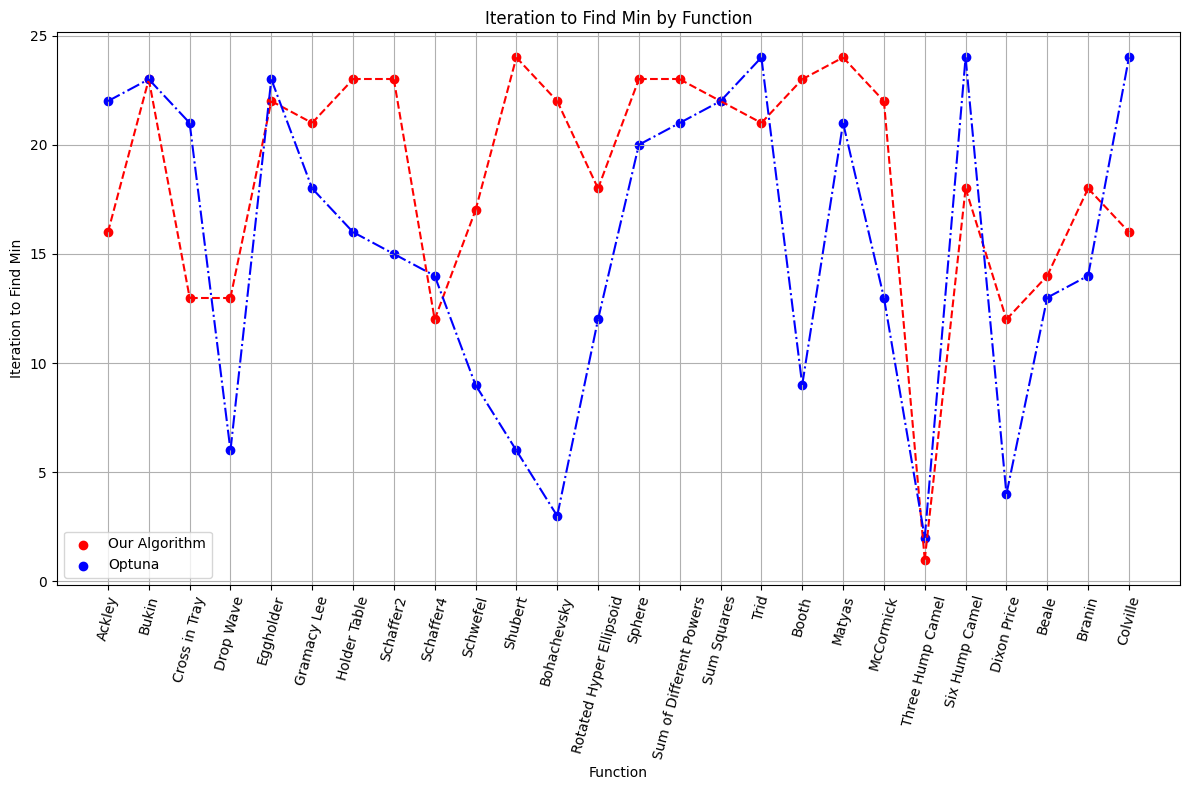

In [2]:
function_names = ex_func.function_ranges.keys()

# Her bir fonksiyon için işlemleri gerçekleştir
number_of_repeats = 1


distances_first = {
    "Function": [],
    "Distance to Min": []
}

distances_second = {
    "Function": [],
    "Distance to Min": []
}

for function_name in function_names:
    if True:
        #print(f"Working on function: {function_name}")
    
        total_distances = 0
        for i in range(number_of_repeats):
            iteration_count = 0
            if True:
                    
                try:
                    

                    function_param = getattr(ex_func, function_name.lower().replace(" ", "_"))

                    # Aralığı al
                    range_param = ex_func.function_ranges[function_name]
                    dimension = len(ex_func.function_ranges[function_name])

                    min_param = ex_func.function_min_inputs[function_name]


                    # Generate initial samples
                    sampler = samplers.LatinHypercubeSampling(function_param)
                    initial_points = sampler.sample(num_samples=5, ranges=range_param)
                    initial_values = np.array([function_param(i) for i in initial_points])

                    # Train the initial model using random forests
                    rf_model = models.RandomForestModel(n_estimators=200, random_state=1729)
                    rf_model.train_model(initial_points, initial_values)
                    trained_rf_model = rf_model.get_model()

                     # Perform active learning
                    active_learning = models.ActiveLearning(initial_points, initial_values, rf_model, sampler)
                    min_function_params, min_function_values, improvement, new_points_all, iteration, current_min_iter_first = active_learning.run_active_learning_constant_iterations_15(2000, range_param, 3)
                    iteration_count += iteration
                    minimum_value_so_far = min(min_function_values)
                    
                    total_distances += gen_def.distance_btw_two_points(min_param, min_function_params)/gen_def.grid_diagonal_distance(range_param)
                    #print(proximity_to_minimum_count)

                    

                    #print(f"Actual global min value is: {ex_func.function_mins[function_name]}")
                
                    
                
                except Exception as e:
                    print(f"{function_name} function failed.")
                    print(e)

               
        if True:
            distances_first["Function"].append(function_name)
            distances_first["Distance to Min"].append(total_distances/number_of_repeats)


for function_name in function_names:
    if True:
        #print(f"Working on function: {function_name}")
    
        total_distances = 0
        for i in range(number_of_repeats):
            iteration_count = 0
            if True:
                    
                try:
                    

                    function_param = getattr(ex_func, function_name.lower().replace(" ", "_"))

                    # Aralığı al
                    range_param = ex_func.function_ranges[function_name]
                    dimension = len(ex_func.function_ranges[function_name])

                    min_param = ex_func.function_min_inputs[function_name]



                    def objective(trial):
                        ranges = ex_func.function_ranges[function_name]
                        
                        params = [trial.suggest_uniform(f'x{i}', min_range, max_range) for i, (min_range, max_range) in enumerate(ranges)]
                        
                        return function_param(params)
                    
                    optuna.logging.set_verbosity(optuna.logging.WARNING)
                    study = optuna.create_study(direction='minimize')
                    study.optimize(objective, n_trials=15)

                    #print('Best parameters:', study.best_params)
                    #print('Best value:', study.best_value)
                    
                    iteration_count += iteration
                    minimum_value_so_far = study.best_value
                    
                    best_trial = study.best_trial
                    
                    total_distances += gen_def.distance_btw_two_points(min_param, [round(value, 1) for value in best_trial.params.values()])/gen_def.grid_diagonal_distance(range_param)
                    #print(proximity_to_minimum_count)

                    

                    #print(f"Actual global min value is: {ex_func.function_mins[function_name]}")
                
                    
                
                except Exception as e:
                    print(f"{function_name} function failed.")
                    print(e)

               
        if True:
            distances_second["Function"].append(function_name)
            distances_second["Distance to Min"].append(total_distances/number_of_repeats)





#Distacnes
#50 run

function_names = ex_func.function_ranges.keys()

# Her bir fonksiyon için işlemleri gerçekleştir
number_of_repeats = 5

distances_first = {
    "Function": [],
    "Distance to Min": []
}

distances_second = {
    "Function": [],
    "Distance to Min": []
}


for function_name in function_names:
    if True:
        #print(f"Working on function: {function_name}")
    
        total_distances = 0
        for i in range(number_of_repeats):
            iteration_count = 0
            if True:
                    
                try:
                    

                    function_param = getattr(ex_func, function_name.lower().replace(" ", "_"))

                    # Aralığı al
                    range_param = ex_func.function_ranges[function_name]

                    min_param = ex_func.function_min_inputs[function_name]


                    # Generate initial samples
                    sampler = samplers.LatinHypercubeSampling(function_param)
                    initial_points = sampler.sample(num_samples=5, ranges=range_param)
                    initial_values = np.array([function_param(i) for i in initial_points])

                    # Train the initial model using random forests
                    rf_model = models.RandomForestModel(n_estimators=200, random_state=1729)
                    rf_model.train_model(initial_points, initial_values)
                    trained_rf_model = rf_model.get_model()

                    # Perform active learning
                    active_learning = models.ActiveLearning(initial_points, initial_values, rf_model, sampler)
                    min_function_params, min_function_values, improvement, new_points_all, iteration, current_min_iter_first = active_learning.run_active_learning_constant_iterations_25(2000, range_param, 3)
                    iteration_count += iteration
                    minimum_value_so_far = min(min_function_values)
                    
                    total_distances += gen_def.distance_btw_two_points(min_param, min_function_params)/gen_def.grid_diagonal_distance(range_param)
                    #print(proximity_to_minimum_count)

                    

                    #print(f"Actual global min value is: {ex_func.function_mins[function_name]}")

                except Exception as e:
                    print(f"{function_name} function failed.")
                    print(e)

        if True:
            distances_first["Function"].append(function_name)
            distances_first["Distance to Min"].append(total_distances/number_of_repeats)
            
            
# LHS
for function_name in function_names:
    if True:
        #print(f"Working on function: {function_name}")
    
        total_distances = 0
        for i in range(number_of_repeats):
            iteration_count = 0
            if True:
                    
                try:
                    

                    function_param = getattr(ex_func, function_name.lower().replace(" ", "_"))

                    # Aralığı al
                    range_param = ex_func.function_ranges[function_name]

                    min_param = ex_func.function_min_inputs[function_name]



                    def objective(trial):
                        ranges = ex_func.function_ranges[function_name]
                        
                        params = [trial.suggest_uniform(f'x{i}', min_range, max_range) for i, (min_range, max_range) in enumerate(ranges)]
                        
                        return function_param(params)
                    
                    optuna.logging.set_verbosity(optuna.logging.WARNING)
                    study = optuna.create_study(direction='minimize')
                    study.optimize(objective, n_trials=25)

                    #print('Best parameters:', study.best_params)
                    #print('Best value:', study.best_value)
                    
                    iteration_count += iteration
                    minimum_value_so_far = study.best_value
                    
                    best_trial = study.best_trial
                    
                    total_distances += gen_def.distance_btw_two_points(min_param, [round(value, 1) for value in best_trial.params.values()])/gen_def.grid_diagonal_distance(range_param)
                    #print(proximity_to_minimum_count)

                    

                    #print(f"Actual global min value is: {ex_func.function_mins[function_name]}")
                
                    
                
                except Exception as e:
                    print(f"{function_name} function failed.")
                    print(e)

        if True:
            distances_second["Function"].append(function_name)
            distances_second["Distance to Min"].append(total_distances/number_of_repeats)




# Convert the dictionary to a DataFrame
distances_first_df = pd.DataFrame(distances_first)

# Convert the dictionary to a DataFrame
distances_second_df = pd.DataFrame(distances_second)

plt.figure(figsize=(12, 8))

# İlk veri kümesini çizdirme
for i, (function, proximity) in enumerate(zip(distances_first_df["Function"], distances_first_df["Distance to Min"])):

    # Scatter plot - kırmızı renk
    plt.scatter(i, proximity, color='red', label="Our Algorithm" if i == 0 else '')

    # Line plot
    if i < len(min_iter_first_df["Function"]) - 1:
        plt.plot([i, i + 1], [proximity, distances_first_df["Distance to Min"][i + 1]], color='red', linestyle='--')

# İkinci veri kümesini çizdirme
for i, (function, proximity) in enumerate(zip(distances_second_df["Function"], distances_second_df["Distance to Min"])):

    # Scatter plot - mavi renk
    plt.scatter(i, proximity, color='blue', label="Optuna" if i == 0 else '')

    # Line plot
    if i < len(min_iter_second_df["Function"]) - 1:
        plt.plot([i, i + 1], [proximity, distances_second_df["Distance to Min"][i + 1]], color='blue', linestyle='-.')


# Add labels and legend
plt.xlabel("Function")
plt.ylabel("Distance to Min")
plt.title("Distance to Min by Function")
plt.xticks(range(len(distances_first_df["Function"])), distances_first_df["Function"], rotation=75)
plt.grid(True)
plt.tight_layout()

# Show plot
plt.legend()
plt.show()